In [75]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [76]:
df = pd.read_csv('/Users/runforever/CodeRepo/GitRepo/Road/data_exp/src/data.csv')

## 查看数据行列基本信息

In [77]:
print('表格行列数:\n', df.shape)
print('每列数据量和类型:'),
print(df.info())

表格行列数:
 (31, 15)
每列数据量和类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
序号                 31 non-null int64
填报日期               31 non-null object
性别                 31 non-null object
你更倾向于下面哪种付费课程呢？    31 non-null object
其他你想学习的？           14 non-null object
你的工作               31 non-null object
你学Python的目的是？      31 non-null object
找工作你期望的第一份薪资是？     28 non-null object
如果是找工作，需要帮助内推么？    27 non-null object
你是否愿意参与进来          23 non-null object
对我们有什么其他建议？        9 non-null object
填写时长               31 non-null object
填写设备               31 non-null object
操作系统               31 non-null object
浏览器                31 non-null object
dtypes: int64(1), object(14)
memory usage: 3.7+ KB
None


## 查看前五行数据

In [78]:
df.head()

,序号,填报日期,性别,你更倾向于下面哪种付费课程呢？,其他你想学习的？,你的工作,你学Python的目的是？,找工作你期望的第一份薪资是？,如果是找工作，需要帮助内推么？,你是否愿意参与进来,对我们有什么其他建议？,填写时长,填写设备,操作系统,浏览器
0,1,2020-04-01,男,爬虫入门到精通，Python Web后端开发,NaN,在校大学生,提高职场办公效率，找工作,8000-12000,是,参与开发/反馈,NaN,30秒,iPhone,iOS 13.3.1,Wechat Browser 7.0.12(0x17000c27)
1,2,2020-04-01,男,Python Web后端开发，Python进阶，量化交易，Python数据分析,NaN,工作多年想学Python,其他,15000以上,否,参与推广,NaN,46秒,Macintosh,OS X 10.15.3,Chrome 80.0.3987.149
2,3,2020-04-01,男,Python Web后端开发，Git版本控制，Python数据分析,NaN,工作多年想学Python,找工作，其他,12000-15000,是,NaN,NaN,1分11秒,Android,Android 10,Wechat Browser 7.0.12.1620(0x27000C3C)
3,4,2020-04-01,男,Linux教程，Python数据分析,大数据,刚毕业1-2年新人,用爬虫抓取数据，其他,5000-8000,是,参与推广,NaN,1分34秒,Windows NT 10.0,Windows 10,Wechat Browser 7.0.5
4,5,2020-04-01,男,Python Web后端开发，Python数据分析,NaN,工作多年想学Python,提高职场办公效率，用爬虫抓取数据,NaN,NaN,NaN,NaN,1分10秒,Android,Android 10,Wechat Browser 7.0.12.1620(0x27000C36)


## 1. 粉丝的男女比例（饼图展示）

男    0.806452
女    0.193548
Name: 性别, dtype: float64


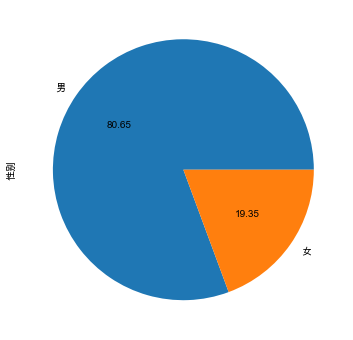

In [79]:
print(df['性别'].value_counts(normalize=True))
df['性别'].value_counts(normalize=True).plot.pie(figsize=(6, 6), autopct='%.2f')
plt.show()

## 2. 粉丝的工作经验（饼图）

工作多年想学Python    0.354839
在校大学生           0.290323
刚毕业1-2年新人       0.161290
其他行业转行          0.129032
其他              0.064516
Name: 你的工作, dtype: float64


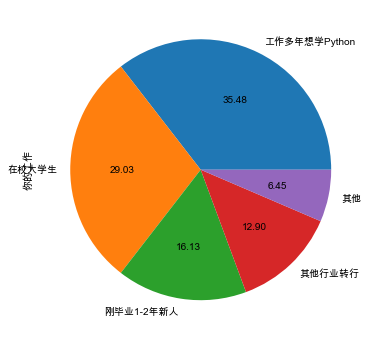

In [81]:
print(df['你的工作'].value_counts(normalize=True))
df['你的工作'].value_counts(normalize=True).plot.pie(figsize=(6, 6), autopct='%.2f')
plt.show()

## 3. 倾向学习的付费课程（条形图）

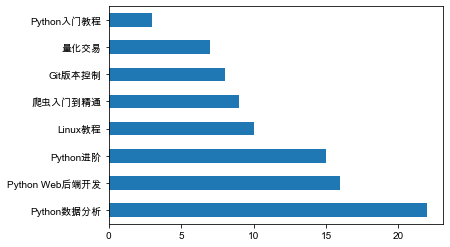

In [82]:
courses = [item.split('，') for item in df['你更倾向于下面哪种付费课程呢？'].values]
courses = [course for course_list in courses for course in course_list]
pd.Series(courses).value_counts().plot.barh()

## 4. 学习 Python 的目的（条形图）

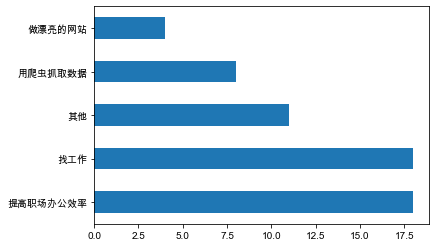

In [83]:
courses = [item.split('，') for item in df['你学Python的目的是？'].values]
courses = [course for course_list in courses for course in course_list]
pd.Series(courses).value_counts().plot.barh()

## 5. 使用的设备（饼图）

Android            0.548387
iPhone             0.193548
Windows NT 10.0    0.193548
Windows            0.032258
Macintosh          0.032258
Name: 填写设备, dtype: float64


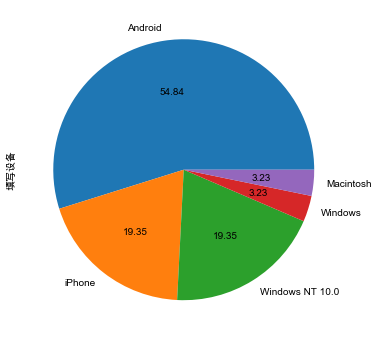

In [84]:
print(df['填写设备'].value_counts(normalize=True))
df['填写设备'].value_counts(normalize=True).plot.pie(figsize=(6, 6), autopct='%.2f')
plt.show()

## 6. 大家的期望薪资（条形图）

5000-8000      10
8000-12000      9
12000-15000     6
15000以上         3
Name: 找工作你期望的第一份薪资是？, dtype: int64


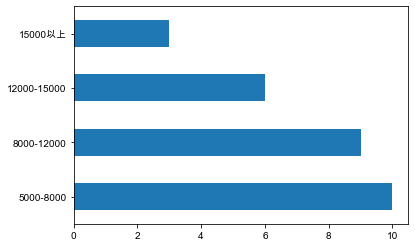

In [85]:
salary = df['找工作你期望的第一份薪资是？'].dropna()
print(salary.value_counts())
salary.value_counts().plot.barh()
plt.show()

## 7. 是否愿意参与内推

是    22
否     5
Name: 如果是找工作，需要帮助内推么？, dtype: int64


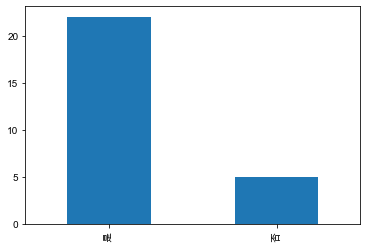

In [86]:
recommend = df['如果是找工作，需要帮助内推么？'].dropna()
print(recommend.value_counts())
recommend.value_counts().plot.bar()
plt.show()

## 8. 是否愿意参与推广

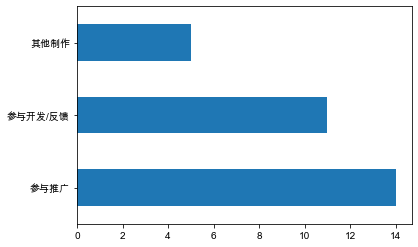

In [87]:
courses = [item.split('，') for item in df['你是否愿意参与进来'].dropna().values]
courses = [course for course_list in courses for course in course_list]
pd.Series(courses).value_counts().plot.barh()

## 9. 填写时长

count     31.000000
mean     121.419355
std       77.984945
min       30.000000
25%       70.500000
50%       94.000000
75%      156.000000
max      337.000000
dtype: float64


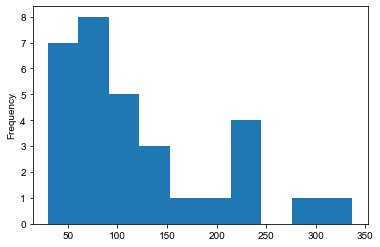

In [88]:
fill_time = [i.replace('秒', '').split('分') for i in df['填写时长'].values]
fill_seconds = []
for i in fill_time:
    if len(i) == 1:
        fill_seconds.append(int(i[0]))
    else:
        fill_seconds.append(int(i[0]) * 60 + int(i[1]))

fill_time_series = pd.Series(fill_seconds)
print(fill_time_series.describe())
fill_time_series.plot.hist()
plt.show()